In [1]:
!pip install osmnx
!apt install python3-rtree

     |████████████████████████████████| 93 kB 2.2 MB/s 
     |████████████████████████████████| 10.3 MB 42.8 MB/s 
     |████████████████████████████████| 62 kB 944 kB/s 
     |████████████████████████████████| 6.6 MB 46.1 MB/s 
     |████████████████████████████████| 994 kB 49.1 MB/s 
     |████████████████████████████████| 994 kB 69.0 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompat

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 40 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-pkg

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# importing libraries
import matplotlib.pyplot as plt
import osmnx as ox
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from scipy.ndimage import distance_transform_edt
import pandas as pd
import itertools
import matplotlib
import networkx as nx
import folium
import statistics
from sklearn.preprocessing import LabelEncoder
import matplotlib.colors as colors
import matplotlib.cm as cmx
import sys
import os
import PIL 

In [5]:
py_file_location = "/content/drive/MyDrive/Silicon Valley Earthquake Challenge"
sys.path.append(os.path.abspath(py_file_location))

In [6]:
%load_ext autoreload 
import SiliconValleyHelperFunctions
%autoreload 2


In [7]:
help(SiliconValleyHelperFunctions)

Help on module SiliconValleyHelperFunctions:

NAME
    SiliconValleyHelperFunctions - # importing libraries

FUNCTIONS
    BuildingDensityCalculator(block_name, edges)
        This proc adds building densities to the dataframe.
        The master files for the are preperared using QGIS tool
    
    CalcualteDistanceTransform(block_name)
        This code is developed by Snajana Tule
        Here we are collacting all the steps necessary to add DistanceRiskScore to the matrix
    
    EdgesExtended(block_name, edges, distance)
        This procedure was developed by Sanajana Tule
        It takes in block name,distance,edges as arguments 
        It returns the Extended Edges dataframe
    
    Line_to_list_lonlats(geom, summary, lon_index, lat_index)
        Function developed by Sanjana Tule
    
    MaxSpeedRiskScoreCalculator(master_file_path, edge)
        This function takes in the path of the Speed Limit Master File and imputes missing 
        values in the Edge dataframe
     

In [ ]:
##Read in the list of neighbourhoods of LA 
df=pd.read_csv('/content/drive/MyDrive/Silicon Valley Earthquake Challenge/LA_NEIGHBOURHOODS_LIST.csv',encoding='cp1252')
names_list = df.values.tolist()
names_list=['Chinatown']

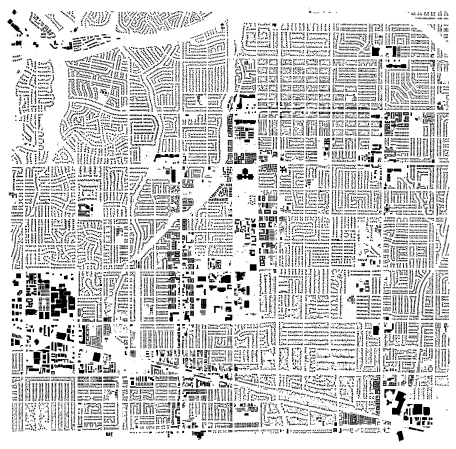

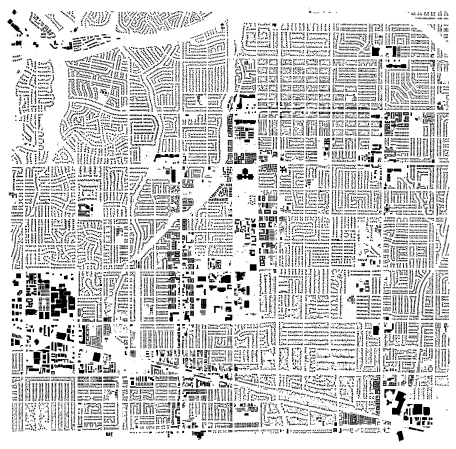

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/networkx/utils/decorators.py:5: DeprecationWarning: write_gpickle is deprecated and will be removed in 3.0.Use ``pickle.dump(G, path, protocol)``
  import warnings


In [13]:
names_list=['Chatsworth']
speed_master_file_path='/content/drive/MyDrive/Silicon Valley Earthquake Challenge/'
speed_master_file_path_2 = '/content/drive/MyDrive/Silicon Valley Earthquake Challenge/SPEED_LIMIT_MASTER.CSV'
file_path='/content/drive/MyDrive/Silicon Valley Earthquake Challenge/'
for name in names_list:
  nodes,edges=SiliconValleyHelperFunctions.block_to_shape(name)
  distance= SiliconValleyHelperFunctions.CalcualteDistanceTransform('Northridge')
  edges_extended = SiliconValleyHelperFunctions.EdgesExtended(name,edges,distance)
  edges_extended=SiliconValleyHelperFunctions.SpeedLimitColumnFormatter(edges_extended)
  #BELOW IS ONE TIME ONLY
  #SiliconValleyHelperFunctions.SpeedMasterFileGenerator(speed_master_file_path,edges_extended)
  edges_extended=SiliconValleyHelperFunctions.MaxSpeedRiskScoreCalculator(speed_master_file_path_2,edges_extended)
  edges['max_speed_risk_score'] = edges_extended['max_speed_risk_score'].values
  edges=SiliconValleyHelperFunctions.BuildingDensityCalculator(name,edges)
  SiliconValleyHelperFunctions.SaveToPicke(file_path,name+'.pickle',edges,nodes)

# SCRATCH 

In [ ]:
edges.head()

osmid  ... Building Density
u        v          key             ...                 
29409715 6403348096 0     15240187  ...               76
         6403348099 0    400864506  ...               76
         6403348105 0    400864518  ...               76
35498896 6711058755 0    399318632  ...               89
         6711058751 0    399318659  ...               89

[5 rows x 16 columns]